In [13]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import math

%matplotlib inline
import matplotlib.pyplot as plt


In [14]:
t_steps = [1, 2, 3, 5, 8, 13, 21, 34, 55]

In [15]:
def draw_data(X, Y):
    class_to_color = {
        1: "r",
        -1: "b"
    }

    colors = list(map(lambda y: class_to_color[y], Y))

    X1 = X[:,0:1].flatten()
    X2 = X[:,1:2].flatten()

    plt.scatter(x=X1, y=X2, c=colors)
    plt.show()


In [16]:
def boosting(X, Y):
    n = X.shape[0]

    w = [1/n] * n

    T = 50
    a = [None] * T
    b = [None] * T

    for t in range(T):
        bt = DecisionTreeClassifier(max_depth=2)
        bt.fit(X, Y, sample_weight=w)

        YP = bt.predict(X)
        nb = 0

        for i in range(n):
            if YP[i] != Y[i]:
                nb += w[i]

        ins = (1 - nb + 1/n) / (nb + 1 / n);
        # print(ins)
        at = 1/2 * math.log(ins)

        a[t] = at
        b[t] = bt

        for i in range(n):
            y1 = Y[i]
            y2 = YP[i]
            # print(y1, y2)
            w[i] = w[i] * math.exp(-at * y1 * y2)

        ws = sum(w)

        for i in range(n):
            w[i] /= ws

    def predict(x_test):
        r = 0

        for j in range(T):
            r += a[j] * b[j].predict(x_test)

        return r

    return predict

In [17]:
def processing(name):
    data = pd.read_csv(name)
    X = data.values[:,:-1]
    Y_words = data.values[:,-1:].flatten()

    Y = np.array(list(map(lambda x: 1 if x == 'N' else -1, Y_words)))

    # drawing train data
    draw_data(X, Y)

    trained_model = boosting(X, Y)

    n = X.shape[0]
    color2 = ['b'] * n

    class_to_color = {
        1: "r",
        -1: "b"
    }

    colors = list(map(lambda y: class_to_color[y], Y))

    for i in range(n):
        r = trained_model([X[i]])

        # r = ada.predict([X[i]])
        if r * Y[i] < 0:
            # print(i, r, Y[i], w[i])
            if colors[i] == 'r':
                colors[i] = 'pink'
            else:
                colors[i] = '#33ff33'
        # color2[i] = 'r'

    X1 = X[:,0:1].flatten()
    X2 = X[:,1:2].flatten()

    plt.scatter(x=X1, y=X2, c=colors)
    plt.show()

In [18]:
# data = pd.read_csv('./data/chips.csv')
# # data = pd.read_csv('./data/geyser.csv')
#
#
#
# X1 = data.values[:,0:1].flatten()
# X2 = data.values[:,1:2].flatten()
#
#
# X = data.values[:,:-1]
# Y1 = data.values[:,2:].flatten()
#
# # print(X1)
# # print(X2)
# # print(Y)
#
# colored = list(map(lambda x: vine_class[x], Y1))
#
#
# Y = np.array(list(map(lambda x: 1 if x == 'N' else -1, Y1)))
#
#
# plt.scatter(x=X1, y=X2, c=colored)
# plt.show()

In [19]:
# n = X1.shape[0]
#
# w = [1/n] * n
#
# T = 50
# a = [None] * T
# b = [None] * T
#

In [20]:
# for t in range(T):
#     bt = DecisionTreeClassifier(max_depth=2)
#     bt.fit(X, Y, sample_weight=w)
#
#     YP = bt.predict(X)
#     nb = 0
#
#     for i in range(n):
#         if YP[i] != Y[i]:
#             nb += w[i]
#
#     ins = (1 - nb + 1/n) / (nb + 1 / n);
#     # print(ins)
#     at = 1/2 * math.log(ins)
#
#     a[t] = at
#     b[t] = bt
#
#     for i in range(n):
#         y1 = Y[i]
#         y2 = YP[i]
#         # print(y1, y2)
#         w[i] = w[i] * math.exp(-at * y1 * y2)
#
#     ws = sum(w)
#
#     for i in range(n):
#         w[i] /= ws


In [21]:
# color2 = ['b'] * n

In [22]:
from sklearn.ensemble import AdaBoostClassifier

# ada = AdaBoostClassifier(n_estimators=T, base_estimator=DecisionTreeClassifier(max_depth=2))
# ada.fit(X, Y)


In [23]:
# for i in range(n):
#     r = 0
#
#     for j in range(T):
#         r += a[j] * b[j].predict([X[i]])
#
#     # r = ada.predict([X[i]])
#     if r * Y[i] < 0:
#         print(i, r, Y[i], w[i])
#         if colored[i] == 'r':
#             colored[i] = 'pink'
#         else:
#             colored[i] = '#33ff33'
#         # color2[i] = 'r'
#

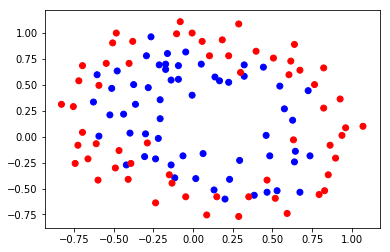

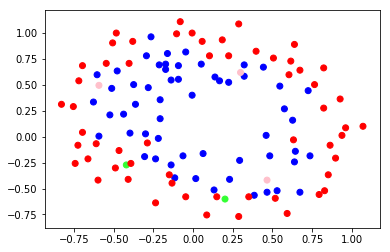

In [24]:
# plt.scatter(x=X1, y=X2, c=colored)
# plt.show()


processing('./data/chips.csv')